Predict Credit Card defaulters using KNN Modeling 

In [243]:
## install and load the decison tree package-----
rm(list=ls()) ; gc()
library(C50)			  # For decision tree induction classification
library(dplyr)			# For data manipulation
library(ggplot2)		# For plotting 
library(caret)			# for data-preprocessing & for data-partitioning
library(fastknn)
# library("devtools")
# install_github("davpinto/fastknn")
library(dplyr)
library(magrittr)
library(forcats)  # For feature reordering in ggplot
library(ggthemes)	 # For a variety of plot-themes
library(gridExtra) 



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2373362,126.8,6861544,366.5,6861544,366.5
Vcells,5062421,38.7,15361660,117.3,37502174,286.2


In [244]:
setwd('C:\\Users\\vikandul\\Desktop\\BIG DATA - FORE SCHOOL COURSE\\Class Notes and Supporting documentation\\Week_06162018\\Excercise\\UCI_Credit_Card.csv')
cc_data <- read.csv("UCI_Credit_Card.csv", header =TRUE)
head(cc_data)


ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0



1. Split the data into 2 data frames to derive and compare summary classification of customers based on default payers(Yes and No). This study of summary statistics will help us determine which attributes are more independent and can be used as strong predictors.
2. The purpose of such an analysis by class is to get an initial idea about whether the classes are indeed separable as well as to understand which of the independent variables have most discriminatory power.


In [245]:

# Create data frame for default payers(=1)
def_pay<- cc_data%>% filter(default.payment.next.month==1)
# Create a data frame for non default payers(=0)
def_pay_n<- cc_data%>% filter(default.payment.next.month==0)


In [246]:

#Derive summary statistics for both classes
summary_Stat <- do.call(data.frame, 
               list(mean_def_pay = round(apply(def_pay, 2, mean),2),
                    mean_def_pay_n = round(apply(def_pay_n, 2, mean),2),
                    sd_def_pay = round(apply(def_pay, 2, sd),2),
                    sd_def_pay_n = round(apply(def_pay_n, 2, sd),2),
                    median_def_pay = apply(def_pay, 2, median),
                    median_def_pay_n = apply(def_pay_n, 2, median),
                    min_def_pay = apply(def_pay, 2, min),
                    min_def_pay_n = apply(def_pay_n, 2, min),
                    max_def_pay = apply(def_pay, 2, max),
                    max_def_pay_n = apply(def_pay_n, 2, max),
                    total_def_pay = apply(def_pay, 2, length),
                    total_def_pay_n = apply(def_pay_n, 2, length)
                    )
               )
summary_Stat


,mean_def_pay,mean_def_pay_n,sd_def_pay,sd_def_pay_n,median_def_pay,median_def_pay_n,min_def_pay,min_def_pay_n,max_def_pay,max_def_pay_n,total_def_pay,total_def_pay_n
ID,14773.78,15064.89,8571.62,8684.55,14758.5,15073.5,1,3,30000,29997,6636,23364
LIMIT_BAL,130109.66,178099.73,115378.54,131628.36,90000.0,150000.0,10000,10000,740000,1000000,6636,23364
SEX,1.57,1.61,0.50,0.49,2.0,2.0,1,1,2,2,6636,23364
EDUCATION,1.89,1.84,0.73,0.81,2.0,2.0,1,0,6,6,6636,23364
MARRIAGE,1.53,1.56,0.53,0.52,2.0,2.0,0,0,3,3,6636,23364
AGE,35.73,35.42,9.69,9.08,34.0,34.0,21,21,75,79,6636,23364
PAY_0,0.67,-0.21,1.38,0.95,1.0,0.0,-2,-2,8,8,6636,23364
PAY_2,0.46,-0.30,1.50,1.04,0.0,0.0,-2,-2,7,8,6636,23364
PAY_3,0.36,-0.32,1.50,1.05,0.0,0.0,-2,-2,8,8,6636,23364
PAY_4,0.25,-0.36,1.51,1.01,0.0,0.0,-2,-2,8,8,6636,23364


The Total # of customers who make default payements is 6636 Vs Non defaulters 23364. The data distribution is not even and we need to scale and center the data before we start modeling for prediction.

The Mean , Median, standard deviation for Age, Marriage, education and Sex are almost the same for 2 classes of data and these attributes can be classified as categorical variables and not continuous.

The average monthly Bill Amounts for both the classes fall under same range we see huge difference in payments made for both the classes. Hence its good to consider the following attributes for prediction :
    1. PAY_0 , PAY_2 to PAY_6 and
    2. BILL_AMT1 TO BILL_AMT6  and 
    3. PAY_AMT1 to PAY_AMT6 

In [247]:
# Feature Engineering

# convert SEX to categorical variables 
cc_data$SEX<- as.factor(cc_data$SEX)
levels(cc_data$SEX)<- c("Male","Female") 
cc_data$SEX<- as.factor(cc_data$SEX)
def_pay$SEX <- as.factor(def_pay$SEX)
def_pay_n$SEX <- as.factor(def_pay_n$SEX)

# Convert EDUCATION TO Categorical variable 
# This field have some values with no classification like 0, We have assigned this value to Unknown category
cc_data$EDUCATION<- as.factor(cc_data$EDUCATION)
levels (cc_data$EDUCATION)<- c('Unkonwn', 'Graduate school' ,'University','High school','Others','Unknown','Unknown')
def_pay$EDUCATION<- as.factor(def_pay$EDUCATION)
def_pay_n$EDUCATION<- as.factor(def_pay_n$EDUCATION)

# Convert MARRIAGE to Categorical variable
cc_data$MARRIAGE<- as.factor(cc_data$MARRIAGE)
levels(cc_data$MARRIAGE)<-c("Others", 'Married', 'Single', 'Others') # As we have some unknown value as 0 in marriage , I am merging this value with others category
def_pay$MARRIAGE<- as.factor(def_pay$MARRIAGE)
def_pay_n$MARRIAGE<- as.factor(def_pay_n$MARRIAGE)

# Add a New variables age_class by classifying  AGE into multiple categories like young, middle , Senior.
cc_data$age_class<-cut(cc_data$AGE, 3,labels = c("young", "middle","senior"))
def_pay$age_class<-cut(def_pay$AGE, 3,labels = c("young", "middle","senior"))
def_pay_n$age_class<-cut(def_pay_n$AGE, 3,labels = c("young", "middle","senior"))



# AVERAGE CREDIT BILL AMOUNT
for(i in 1:nrow(cc_data)){
  cc_data$avg_crd_bill[i] <- round((cc_data$BILL_AMT1[i] +cc_data$BILL_AMT2[i]+cc_data$BILL_AMT3[i]+cc_data$BILL_AMT4[i]+cc_data$BILL_AMT5[i]+cc_data$BILL_AMT6[i])/6,2)
}

# AVERAGE Payment made
for(i in 1:nrow(cc_data)){
  cc_data$avg_pay_amt[i] <- round((cc_data$PAY_AMT1[i] +cc_data$PAY_AMT2[i]+cc_data$PAY_AMT3[i]+cc_data$PAY_AMT4[i]+cc_data$PAY_AMT5[i]+cc_data$PAY_AMT6[i])/6,2)
}

str(cc_data)
head(cc_data)


'data.frame':	30000 obs. of  28 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL                 : num  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX                       : Factor w/ 2 levels "Male","Female": 2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION                 : Factor w/ 6 levels "Unkonwn","Graduate school",..: 3 3 3 3 3 2 2 3 4 4 ...
 $ MARRIAGE                  : Factor w/ 3 levels "Others","Married",..: 2 3 3 2 2 3 3 3 2 3 ...
 $ AGE                       : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0                     : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2                     : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3                     : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4                     : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5                     : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6                     : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1                 : num  3913 2682 29239 

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,age_class,avg_crd_bill,avg_pay_amt
1,20000,Female,University,Married,24,2,2,-1,-1,...,0,689,0,0,0,0,1,young,1284.00,114.83
2,120000,Female,University,Single,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,young,2846.17,833.33
3,90000,Female,University,Single,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,young,16942.17,1836.33
4,50000,Female,University,Married,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,young,38555.67,1398.00
5,50000,Male,University,Married,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,middle,18223.17,9841.50
6,50000,Male,Graduate school,Single,37,0,0,0,0,...,2500,1815,657,1000,1000,800,0,young,39685.67,1295.33


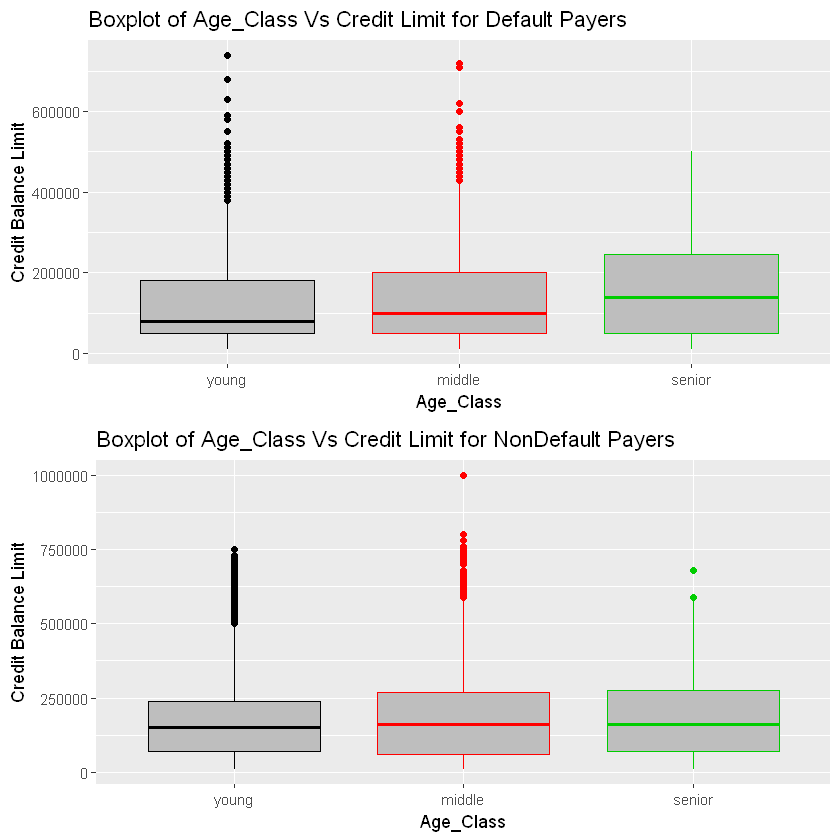

In [248]:
# Lets plot some graphs to understand the statistics using visual representation.

options(scipen=999)         # Avoid exponential notations
options(max.print=999999)   # For tibble, it is df %>% tbl_df %>% print(n=400)

grid.arrange(ggplot(data=def_pay, aes(x=age_class,y=LIMIT_BAL)) +  
             geom_boxplot(fill = 'grey'  ,colour = c(1,2,3))+ 
             scale_x_discrete(name = "Age_Class") + 
             scale_y_continuous(name = "Credit Balance Limit") +
              ggtitle("Boxplot of Age_Class Vs Credit Limit for Default Payers"), 
             ggplot(data=def_pay_n, aes(x=age_class,y=LIMIT_BAL)) +
             geom_boxplot(fill = 'grey'  ,colour = c(1,2,3))  + 
             scale_x_discrete(name = "Age_Class")+ 
             scale_y_continuous(name = "Credit Balance Limit")+
               ggtitle("Boxplot of Age_Class Vs Credit Limit for NonDefault Payers")
            )


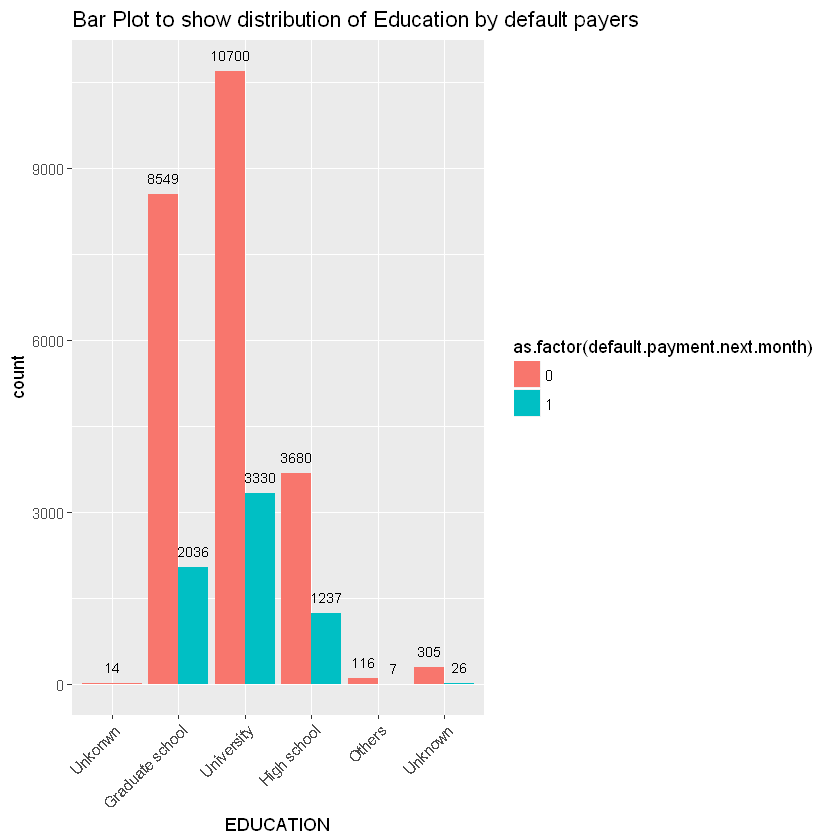

In [249]:
education<-ggplot(data=cc_data, aes(x=EDUCATION, fill = as.factor(default.payment.next.month)))    +geom_bar(position="dodge")  + 
  geom_text(stat='count', aes(label=..count.., vjust = -1), size = 3, position = position_dodge(width=.9))+
 ggtitle("Bar Plot to show distribution of Education by default payers")+ theme(axis.text.x = element_text(angle = 45,hjust=1))
education


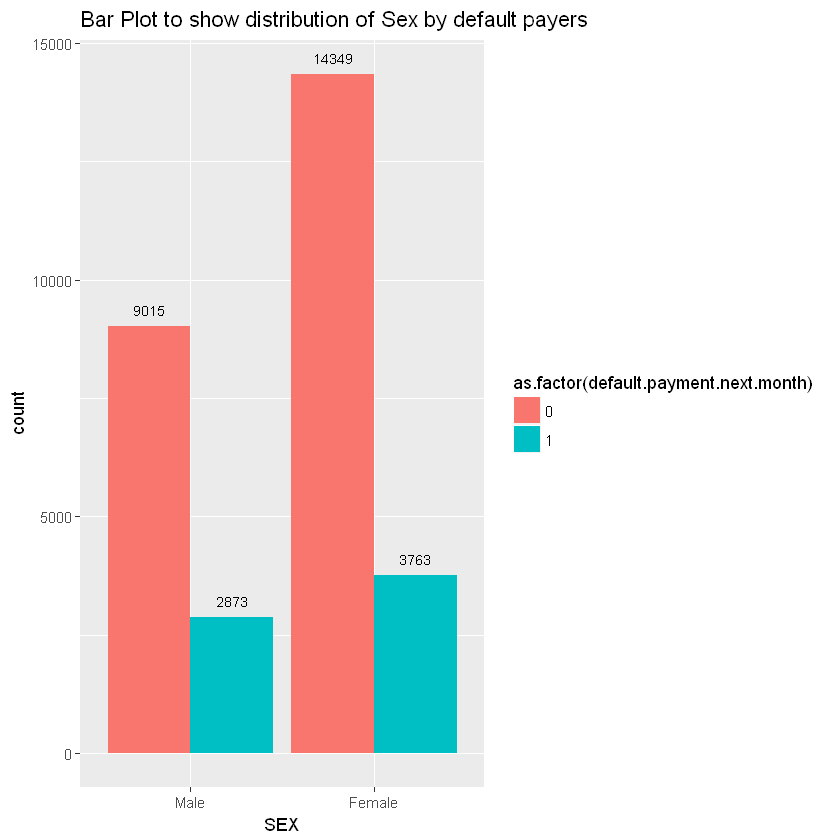

In [250]:
sex_class<-ggplot(data=cc_data, aes(x=SEX, fill = as.factor(default.payment.next.month)))    +geom_bar(position="dodge")  + 
  geom_text(stat='count', aes(label=..count.., vjust = -1), size = 3, position = position_dodge(width=.9))+
ggtitle("Bar Plot to show distribution of Sex by default payers")

sex_class


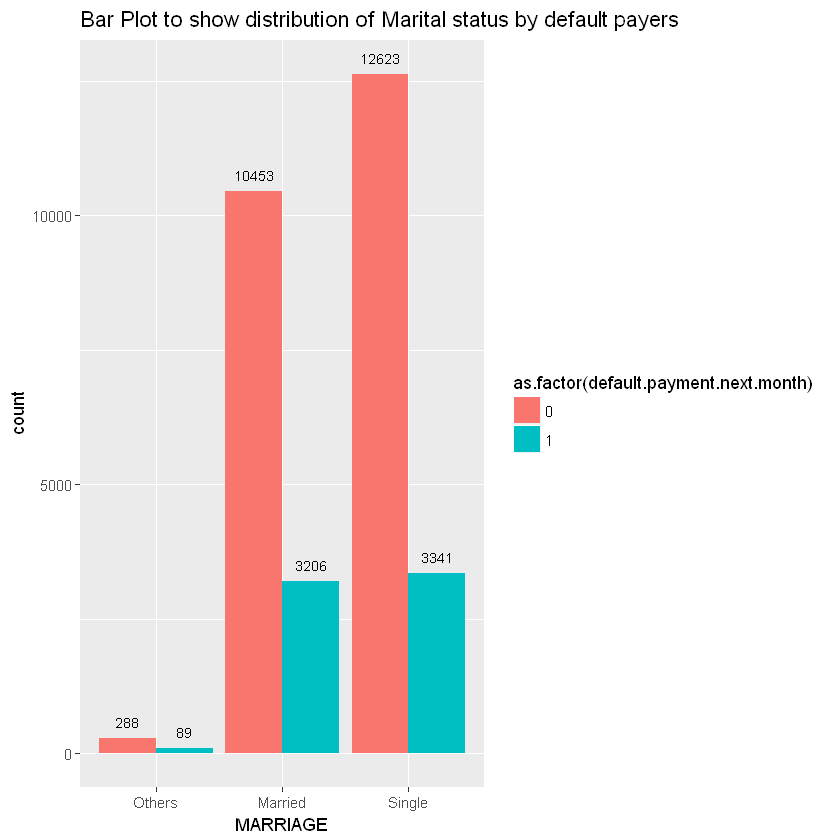

In [251]:
marriage_class<-ggplot(data=cc_data, aes(x=MARRIAGE, fill = as.factor(default.payment.next.month)))    +geom_bar(position="dodge")  + 
  geom_text(stat='count', aes(label=..count.., vjust = -1), size = 3, position = position_dodge(width=.9))+
ggtitle("Bar Plot to show distribution of Marital status by default payers")

marriage_class

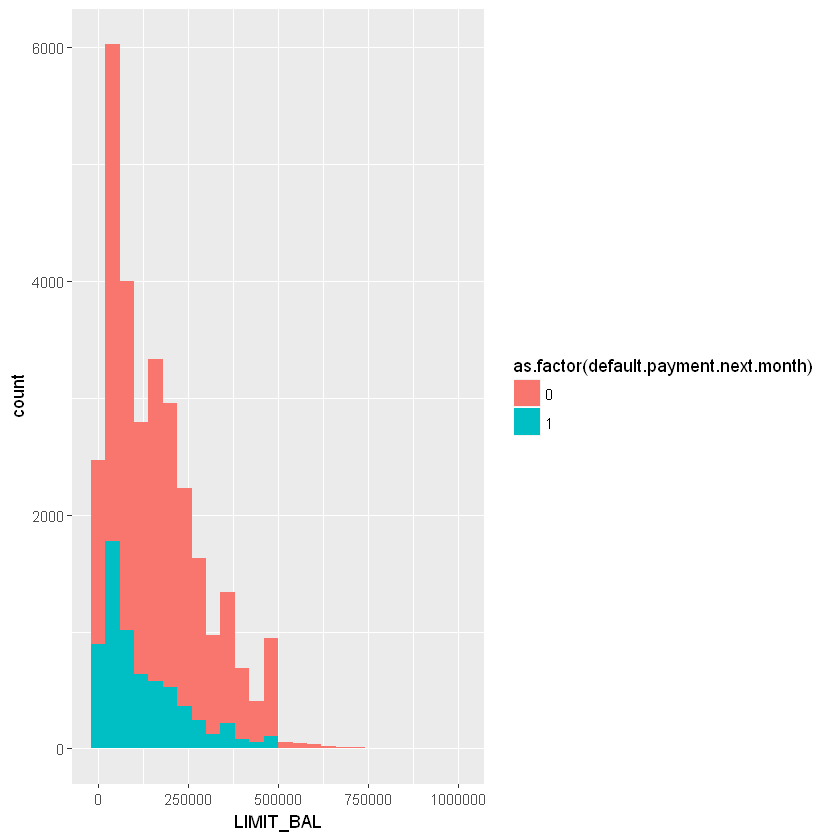

In [252]:
ggplot(cc_data, aes(LIMIT_BAL,fill =  as.factor(default.payment.next.month)))+ geom_histogram(position = 'stack', binwidth =40000)

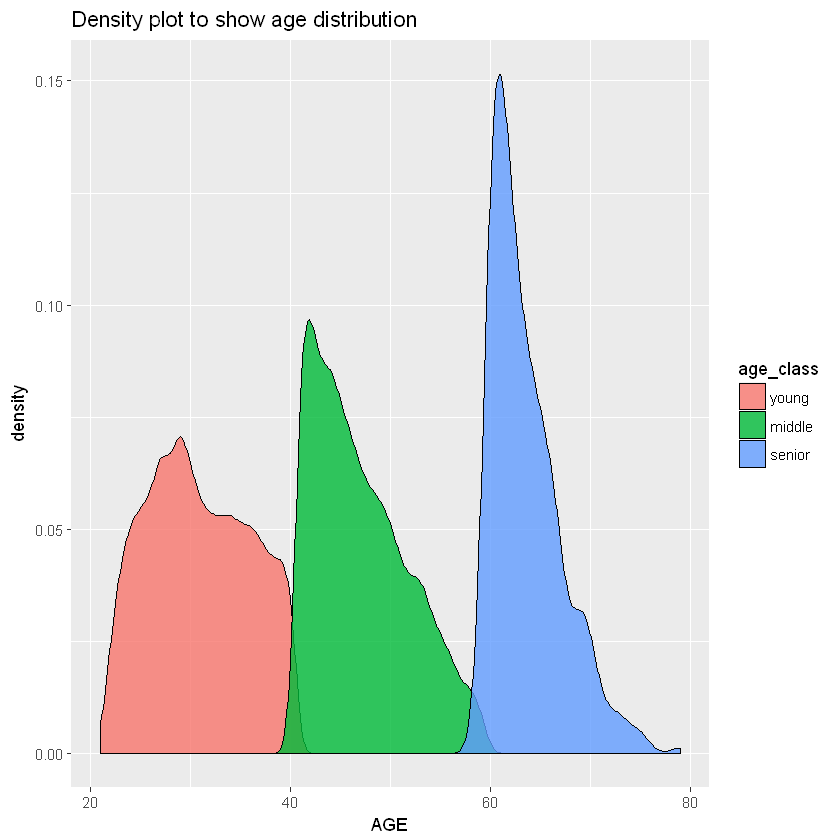

In [253]:
ggplot(cc_data, aes(x = AGE,fill = age_class ))+  
  geom_density( alpha=0.8 )+ ggtitle("Density plot to show age distribution")

In [254]:

# As we see ID  attribute is of no significance, delete it
cc_data$ID <- NULL
head(cc_data)
dim(cc_data)
str(cc_data)



LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,age_class,avg_crd_bill,avg_pay_amt
20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,young,1284.00,114.83
120000,Female,University,Single,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,young,2846.17,833.33
90000,Female,University,Single,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,young,16942.17,1836.33
50000,Female,University,Married,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,young,38555.67,1398.00
50000,Male,University,Married,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,middle,18223.17,9841.50
50000,Male,Graduate school,Single,37,0,0,0,0,0,...,2500,1815,657,1000,1000,800,0,young,39685.67,1295.33


[1] 30000    27

'data.frame':	30000 obs. of  27 variables:
 $ LIMIT_BAL                 : num  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX                       : Factor w/ 2 levels "Male","Female": 2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION                 : Factor w/ 6 levels "Unkonwn","Graduate school",..: 3 3 3 3 3 2 2 3 4 4 ...
 $ MARRIAGE                  : Factor w/ 3 levels "Others","Married",..: 2 3 3 2 2 3 3 3 2 3 ...
 $ AGE                       : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0                     : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2                     : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3                     : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4                     : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5                     : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6                     : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1                 : num  3913 2682 29239 46990 8617 ...
 $ BILL_AMT2                 : num  3102 1725 

In [255]:
head(cc_data)
dim(cc_data)

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,age_class,avg_crd_bill,avg_pay_amt
20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,young,1284.00,114.83
120000,Female,University,Single,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,young,2846.17,833.33
90000,Female,University,Single,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,young,16942.17,1836.33
50000,Female,University,Married,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,young,38555.67,1398.00
50000,Male,University,Married,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,middle,18223.17,9841.50
50000,Male,Graduate school,Single,37,0,0,0,0,0,...,2500,1815,657,1000,1000,800,0,young,39685.67,1295.33


[1] 30000    27

In [256]:
# Scale and centering the data
model_data<- cc_data[,c(1,6:23, 26,24)]
head(model_data)
model_data$default.payment.next.month<- as.factor(model_data$default.payment.next.month)
transformed_data = preProcess(model_data[,c(-21)],  method=c("center", "scale"))

#Get transfromed data using predict() from 'trans' model
PC = predict(transformed_data, model_data[,c(-21)])		# Returns scaled, centered data 
dim(PC)      
class(PC) 



LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,avg_crd_bill,default.payment.next.month
20000,2,2,-1,-1,-2,-2,3913,3102,689,...,0,0,0,689,0,0,0,0,1284.00,1
120000,-1,2,0,0,0,2,2682,1725,2682,...,3455,3261,0,1000,1000,1000,0,2000,2846.17,1
90000,0,0,0,0,0,0,29239,14027,13559,...,14948,15549,1518,1500,1000,1000,1000,5000,16942.17,0
50000,0,0,0,0,0,0,46990,48233,49291,...,28959,29547,2000,2019,1200,1100,1069,1000,38555.67,0
50000,-1,0,-1,0,0,0,8617,5670,35835,...,19146,19131,2000,36681,10000,9000,689,679,18223.17,0
50000,0,0,0,0,0,0,64400,57069,57608,...,19619,20024,2500,1815,657,1000,1000,800,39685.67,0


[1] 30000    20

[1] "data.frame"

In [257]:
model_train <- cbind(PC,target=model_data[,21])
dim(model_train)      # 61878 X 97


[1] 30000    21

In [258]:
# Partition data in train/validation sets.
#   Partition in a stratified manner
trainindex<-createDataPartition(model_train$target,p=0.8,list=FALSE)
training_data<-model_train[trainindex,]  ;     dim(training_data)
validation_data<-model_train[-trainindex,]  ; dim(validation_data)
head(training_data)

# Use KNN to model and predict default payers

system.time(
  newfe   <- knnExtract(                                      # It is FastKNN function
    xtr = data.matrix(training_data[,-21]),          # 97 is target
    ytr = training_data[,21],
    xte = data.matrix(validation_data[,-21]),
    k = 3
  )
)


[1] 24001    21

[1] 5999   21

LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,avg_crd_bill,target
-1.1367012,1.79453395,1.7823185,-0.6966518,-0.6665876,-1.5300205,-1.4860160,-0.64249036,-0.64738844,-0.66798218,...,-0.6630475,-0.6527133,-0.3419359,-0.2270819,-0.2967963,-0.3080574,-0.3141309,-0.29337717,-0.69068047,1
-0.3659744,-0.87497656,1.7823185,0.1388625,0.1887429,0.2349126,1.9922823,-0.65920776,-0.66673546,-0.63924364,...,-0.6062192,-0.5979564,-0.3419359,-0.2135841,-0.2400006,-0.2442256,-0.3141309,-0.18087519,-0.66598632,1
-0.5971924,0.01486028,0.1117342,0.1388625,0.1887429,0.2349126,0.2531332,-0.29855468,-0.49389088,-0.48240015,...,-0.4171807,-0.3916230,-0.2502874,-0.1918835,-0.2400006,-0.2442256,-0.2486786,-0.01212223,-0.44316243,0
-0.9054832,0.01486028,0.1117342,0.1388625,0.1887429,0.2349126,0.2531332,-0.05749007,-0.01329247,0.03284593,...,-0.1867259,-0.1565763,-0.2211869,-0.1693583,-0.2286415,-0.2378424,-0.2441624,-0.23712618,-0.10150493,0
-0.9054832,-0.87497656,0.1117342,-0.6966518,0.1887429,0.2349126,0.2531332,-0.57860845,-0.61130773,-0.16118606,...,-0.3481314,-0.3314761,-0.2211869,1.3350119,0.2711608,0.2664292,-0.2690343,-0.25518275,-0.42291290,0
-0.9054832,0.01486028,0.1117342,0.1388625,0.1887429,0.2349126,0.2531332,0.17894364,0.11085439,0.15277489,...,-0.3403515,-0.3164813,-0.1909996,-0.1782122,-0.2594815,-0.2442256,-0.2486786,-0.24837638,-0.08364235,0


Building new training set...


  |======================================================================| 100%


Building new test set...


  |======================================================================| 100%


   user  system elapsed 
   0.45    0.23    4.71 

In [259]:
head(newfe$new.tr )   ;dim(newfe)      # New training features
head(newfe$new.te)          # New test features
dim(newfe$new.tr)           
dim(newfe$new.te) 


knn1,knn2,knn3,knn4,knn5,knn6
1.178349,2.525218,3.888484,1.206888,2.425974,3.804181
1.019950,2.176624,3.439943,1.680694,3.455741,5.234202
0.269313,0.563465,0.861321,0.353256,0.733011,1.123786
0.044461,0.091601,0.146580,0.064533,0.178632,0.296686
1.124468,2.296273,3.485623,1.433688,2.914766,4.439014
0.121741,0.268814,0.419351,0.219431,0.452006,0.716688


NULL

knn1,knn2,knn3,knn4,knn5,knn6
0.239031,0.485190,0.743102,0.215498,0.471798,0.833030
0.522989,1.305250,2.284846,1.229574,2.746519,4.274286
0.118019,0.291306,0.465332,0.028968,0.143770,0.281819
0.050200,0.133828,0.220731,0.131379,0.273788,0.426808
2.368373,4.992835,7.732559,2.969701,6.267958,9.737395
0.493275,1.406025,2.428896,0.918943,2.211292,3.666550


[1] 24001     6

[1] 5999    6

[1] "matrix"

[1] "matrix"

In [260]:
#Scale and center these new features using caret (preProcess())
new<-rbind(newfe$new.tr, newfe$new.te)
trans = preProcess(new,  method=c("center", "scale"))
PC = predict(trans, new)		# Returns scaled, centered data 
head(PC)

knn1,knn2,knn3,knn4,knn5,knn6
0.5038591,0.5032628,0.4781607,0.2791861,0.2154546,0.2053996
0.3579318,0.3503984,0.3514635,0.6306930,0.5790751,0.5295724
-0.3336027,-0.3569992,-0.3769075,-0.3541061,-0.3823467,-0.4022215
-0.5407507,-0.5639195,-0.5787970,-0.5683037,-0.5781032,-0.5897176
0.4542205,0.4028665,0.3643665,0.4474443,0.3880517,0.3493105
-0.4695554,-0.4862086,-0.5017487,-0.4533881,-0.4815722,-0.4945070


In [261]:
#Column-wise stack complete set of predictors
#     Original + New features (exclude target)
fx<-cbind(training_data[,-21], PC[1:nrow(newfe$new.tr), ])     
vx<-cbind(validation_data[,-21], PC[(nrow(newfe$new.tr)+1) : nrow(PC), ])


In [262]:
#Model now
system.time(model <-                       # Note 's' is small in system.time()
              C5.0(
                x = fx,                     # Predictors (only)
                y = training_data[, 21],               # Target values
                trials = 10,                # Boosting helps in generalization
                # No of boosting steps
                control = C5.0Control       # parameter control list. May specify separately
                (
                  noGlobalPruning = FALSE,  # Should global pruning be done? FALSE implies: Yes, do it
                  # FALSE => More generlization
                  CF = 0.15,                # Larger CF (0.75)=>Less tree-pruning.
                  # Smaller values (0.1) =>More tree pruning & more general
                  minCases = 4,             # Min cases per leaf-node.
                  # More cases-> More generalization
                  #sample = 0.80,           # Take 80% sample for training
                  winnow = TRUE,            # TRUE may make it more general, FALSE less general
                  earlyStopping = TRUE      # Should boosting be stopped early?
                )
              )
)


   user  system elapsed 
   7.74    0.00    9.19 

In [264]:
#Make predictions now of type class
out <- predict(model, vx , type = "class")
out
# Create a dataframe of actual and predicted classes
#     for quick comparisons
df_comp <- data.frame(predicted = out, actual = validation_data[,21])
head(df_comp)

#  Check accuracy of predictions
#  Create confusion matrix. 'dnn' stands for dimension names

table(
  df_comp$actual,
  df_comp$predicted,
  dnn = c("Actual", "Predicted")    # Table headings
)


[1] 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
  [38] 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 [112] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [223] 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [260] 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 [297] 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 [408] 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 [630] 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 [815] 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [889] 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[1000] 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
[1074] 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
[1111] 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
[1148] 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0
[1222] 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
[1296] 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1
[1370] 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
[1481] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[1555] 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
[1592] 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
[1629] 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
[1666] 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
[1703] 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1
[1777] 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 1 0 0 0 0 0 0 0 0 0 0 0 0

predicted,actual
0,0
0,0
0,1
0,0
0,0
0,0


      Predicted
Actual    0    1
     0 4421  251
     1  840  487

[1] 0.8181364

In [266]:

#Calculate accuracy   
accuracy <- sum(as.character(df_comp$actual) == as.character(df_comp$predicted)) / nrow(df_comp)
accuracy

#Prediction  accuracy is 81.8%. 

[1] 0.8181364

In [269]:
#Which variables were important in predictions
impt<-C5imp(model)

df<-data.frame(x = row.names(impt), y = impt$Overall)

# Filter out variables whose oevrall contribution is zero
df %<>% filter (df$y > 0 )

# Remaining number
nrow(df)    

df

[1] 3

x,y
PAY_0,100.00
PAY_2,89.50
PAY_5,7.61


Pay_0, Pay_2 and Pay_5 are important attributes to predict Default payers. 
Based on the Knn results accuracy is close to 82%